# Alignment Visualization

The aim of this notebook is to create a general representation of a 1 vs. 1 alignment. With this representation, we can see the alignment of two sequences in a more intuitive way. The idea of the chart is to create a line per each species, with its aligned blocks matching with the other species aligned part.  


Taking the output data file \*blocks.csv, a *broken barh* chart is created builded with matplotlib package.

In [110]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as n

import sys
 
# setting path
sys.path.append('../')

import swco

## Data Load

In [111]:
output = '../../Data/Results/Alignment_Visualization/'

timestamp = '20230402_182505'
blocks = pd.read_csv('../../Data\S_W_Intermediate\/Scaffold/' + timestamp + '/blocks.csv')
#blocks = pd.read_csv('../../Data/Intermediate\/blocks_human_gorilla_mouse.csv', sep=';')
#blocks = pd.read_csv('../../Data\S_W_Intermediate\/Scaffold/Human vs all/blocks.csv')
blocks

,species_scaffold,target_scaffold,alignment_id,start,stop,match_perc
0,gorilla_NC_018424.2,NC_018424.2,1,557936.0,227646711.0,0.742497
1,Human_NC_000001.11,NC_018424.2,1,925942.0,247574382.0,0.742497
2,gorilla_NC_018429.2,NC_018429.2,2,63174215.0,165288765.0,0.764798
3,Human_NC_000005.10,NC_018429.2,2,80629145.0,181260813.0,0.764798
4,gorilla_NC_018443.2,NC_018443.2,3,38097824.0,38474316.0,0.875000
5,Human_NW_014040929.1,NC_018443.2,3,1476.0,362254.0,0.875000
6,gorilla_NC_018443.2,NC_018443.2,4,54340.0,57915134.0,0.729412
7,Human_NC_000019.10,NC_018443.2,4,281388.0,58571389.0,0.729412
8,gorilla_NC_018435.2,NC_018435.2,5,247754.0,506178.0,0.923077
9,Human_NT_187586.1,NC_018435.2,5,3534.0,206711.0,0.923077


In [112]:
blocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   species_scaffold  60 non-null     object 
 1   target_scaffold   60 non-null     object 
 2   alignment_id      60 non-null     int64  
 3   start             60 non-null     float64
 4   stop              60 non-null     float64
 5   match_perc        60 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.9+ KB


In [113]:
# Redefine the start and stop columns as integers
blocks.start = blocks.start.astype('int64')
blocks.stop = blocks.stop.astype('int64')

# Set match_perc as percentage format with 2 decimals
blocks.match_perc = blocks.match_perc.astype('float64')
blocks.match_perc = blocks.match_perc.apply(lambda x: '{:.2%}'.format(x))

# Separate species and scaffold from species_scaffold field
blocks['species'] = blocks['species_scaffold'].str.split(pat='_').str[0].str.capitalize()
blocks['scaffold'] = blocks['species_scaffold'].str.split(pat='_', n=1).str[1].str.upper()

blocks.head()

,species_scaffold,target_scaffold,alignment_id,start,stop,match_perc,species,scaffold
0,gorilla_NC_018424.2,NC_018424.2,1,557936,227646711,74.25%,Gorilla,NC_018424.2
1,Human_NC_000001.11,NC_018424.2,1,925942,247574382,74.25%,Human,NC_000001.11
2,gorilla_NC_018429.2,NC_018429.2,2,63174215,165288765,76.48%,Gorilla,NC_018429.2
3,Human_NC_000005.10,NC_018429.2,2,80629145,181260813,76.48%,Human,NC_000005.10
4,gorilla_NC_018443.2,NC_018443.2,3,38097824,38474316,87.50%,Gorilla,NC_018443.2


In [114]:
df_scaffold_length = pd.read_csv('../../Data/Intermediate\df_scaffold_length.csv')
df_scaffold_length.head()

,Specie,#Replicon Name,Replicon Accession,Number of genes,Start,Stop
0,Aadvark,MT,NC_002078.1,13,2744,15310
1,Aadvark,Un,NW_006921588.1,129,2349339,39525097
2,Aadvark,Un,NW_006921589.1,169,30547,38336954
3,Aadvark,Un,NW_006921590.1,77,719496,36587654
4,Aadvark,Un,NW_006921591.1,33,8315,35191965


In [115]:
# Add the scaffold longitud to the blocks dataframe

# Capitalize species_scaffold names for doing the merge correctly
blocks.species_scaffold = blocks.species_scaffold.str.capitalize()

# Create a new column with the species and scaffold name for proper merging and capitalize it
df_scaffold_length['species_scaffold'] = df_scaffold_length.Specie + '_' + df_scaffold_length['Replicon Accession']
df_scaffold_length.species_scaffold = df_scaffold_length.species_scaffold.str.capitalize()

blocks = pd.merge(blocks, df_scaffold_length[['species_scaffold', 'Stop']], left_on='species_scaffold', right_on='species_scaffold', how='left')
blocks.rename(columns={'Stop': 'scaffold_length'}, inplace=True)
blocks.info()

del df_scaffold_length

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   species_scaffold  60 non-null     object
 1   target_scaffold   60 non-null     object
 2   alignment_id      60 non-null     int64 
 3   start             60 non-null     int64 
 4   stop              60 non-null     int64 
 5   match_perc        60 non-null     object
 6   species           60 non-null     object
 7   scaffold          60 non-null     object
 8   scaffold_length   60 non-null     int64 
dtypes: int64(4), object(5)
memory usage: 4.7+ KB


For creating the *broken barh* chart, is required a start and a length of the block. Hence, let us create that field based on the start and end difference of the blocks.  

Moreover, in order to create a line per species each species will have one assigned id.  

Later on, we will create a dictionary with the species as key and the (start, length) tuple as a value. Observe that the species name is included in *species_scaffold* field, therefore we will split it, creating the species and the scaffold column.

Finally, we will create a list of tuples with the id of the species and the length of the block.  


In [116]:
# test
#blocks = blocks[0:6]

In [117]:
'''def recalculate_start_stop(blocks):
    blocks.sort_values(['species', 'scaffold'], inplace=True) # or alignment_id, depend on order priority
    blocks.reset_index(inplace=True, drop=True)

    # A new variable is needed to keep the original stop value and 
    # update the stop and start values by the same amount
    for i in range(1,len(blocks)):
        prev_stop =  blocks.loc[i-1, 'stop']

        if blocks.loc[i, 'species'] == blocks.loc[i-1, 'species']:
            blocks.loc[i, 'stop'] += prev_stop
            blocks.loc[i, 'start'] += prev_stop

    return blocks'''

"def recalculate_start_stop(blocks):\n    blocks.sort_values(['species', 'scaffold'], inplace=True) # or alignment_id, depend on order priority\n    blocks.reset_index(inplace=True, drop=True)\n\n    # A new variable is needed to keep the original stop value and \n    # update the stop and start values by the same amount\n    for i in range(1,len(blocks)):\n        prev_stop =  blocks.loc[i-1, 'stop']\n\n        if blocks.loc[i, 'species'] == blocks.loc[i-1, 'species']:\n            blocks.loc[i, 'stop'] += prev_stop\n            blocks.loc[i, 'start'] += prev_stop\n\n    return blocks"

In [118]:
def recalculate_start_stop(blocks):
    # Sort values for proper iteration
    blocks.sort_values(['species', 'scaffold'], inplace=True) # or alignment_id, depend on order priority
    blocks.reset_index(inplace=True, drop=True)

    # A new variable is needed to keep the original stop value and 
    # update the stop and start values by the same amount
    prev_stop = 0
    for i in range(1,len(blocks)):

        if blocks.loc[i, 'species'] == blocks.loc[i-1, 'species']:
            if blocks.loc[i, 'species_scaffold'] != blocks.loc[i-1, 'species_scaffold']:
                prev_stop =  blocks.loc[i-1, 'scaffold_length']

            blocks.loc[i, 'stop'] += prev_stop
            blocks.loc[i, 'start'] += prev_stop
            blocks.loc[i, 'scaffold_start'] = prev_stop
            blocks.loc[i, 'scaffold_length'] += prev_stop
    
    blocks.rename(columns={'scaffold_length': 'scaffold_stop'}, inplace=True)

    # Substitute nan values to 0
    blocks.scaffold_start.fillna(0, inplace=True)
    
    #blocks.scaffold_stop = blocks.scaffold_stop.astype('int64')
    #blocks.scaffold_start = blocks.scaffold_start.astype('int64')
    
    #return blocks

# Sort blocks table by the desired order of the species
def assign_species_id(order, blocks=blocks):

    # Create a new column with the desired order
    blocks['species_ordered'] = pd.Categorical(blocks['species'], categories=order, ordered=True)

    
    # get the category codes (i.e. IDs) for each entry in the ordered column
    blocks['species_id'] = blocks['species_ordered'].cat.codes
    blocks['species_id'] = blocks['species_id'].astype('int64')

In [119]:
class Bahr:
    def __init__(self, blocks, species, scaffold, start, stop, match_perc, scaffold_start, scaffold_stop):
        self.blocks = blocks 
        self.species = species
        self.scaffold = scaffold
        self.start = start
        self.stop = stop
        self.match_perc = match_perc
        self.scaffold_start = scaffold_start
        self.scaffold_stop = scaffold_stop

    def plot(self, figsize=(10, 5), color='black', linewidth=0.5, alpha=0.5):
        # Plot the blocks
        plt.figure(figsize=figsize)
        plt.hlines(y=self.species, xmin=self.start, xmax=self.stop, color=color, linewidth=linewidth, alpha=alpha)
        plt.xlim(0, self.scaffold_stop.max())
        plt.ylim(-1, len(self.species.unique()) + 1)
        plt.xlabel('Scaffold length')
        plt.ylabel('Species')
        plt.title('Bahr plot')
        plt.show()

    def plot_scaffold(self, figsize=(10, 5), color='black', linewidth=0.5, alpha=0.5):
        # Plot the blocks
        plt.figure(figsize=figsize)
        plt.hlines(y=self.species, xmin=self.scaffold_start, xmax=self.scaffold_stop, color=color, linewidth=linewidth, alpha=alpha)
        plt.xlim(0, self.scaffold_stop.max())
        plt.ylim(-1, len(self.species.unique()) + 1)
        plt.xlabel('Scaffold length')
        plt.ylabel('Species')
        plt.title('Bahr plot')
        plt.show()

    def plot_scaffold_with_gaps(self, figsize=(10, 5), color='black', linewidth=0.5, alpha=0.5):
        # Plot the blocks
        plt.figure(figsize=figsize)
        plt.hlines(y=self.species, xmin=self.scaffold_start, xmax=self.scaffold_stop, color=color, linewidth=linewidth, alpha=alpha)
        plt.xlim(0, self.scaffold_stop.max())
        plt.ylim(-1, len(self.species.unique()) + 1)
        plt.xlabel('Scaffold length')
        plt.ylabel('Species')
        plt.title('Bahr plot')
        plt.show()
    


In [120]:
blocks

,species_scaffold,target_scaffold,alignment_id,start,stop,match_perc,species,scaffold,scaffold_length
0,Gorilla_nc_018424.2,NC_018424.2,1,557936,227646711,74.25%,Gorilla,NC_018424.2,228886650
1,Human_nc_000001.11,NC_018424.2,1,925942,247574382,74.25%,Human,NC_000001.11,248918363
2,Gorilla_nc_018429.2,NC_018429.2,2,63174215,165288765,76.48%,Gorilla,NC_018429.2,165288765
3,Human_nc_000005.10,NC_018429.2,2,80629145,181260813,76.48%,Human,NC_000005.10,181368225
4,Gorilla_nc_018443.2,NC_018443.2,3,38097824,38474316,87.50%,Gorilla,NC_018443.2,57915134
5,Human_nw_014040929.1,NC_018443.2,3,1476,362254,87.50%,Human,NW_014040929.1,362254
6,Gorilla_nc_018443.2,NC_018443.2,4,54340,57915134,72.94%,Gorilla,NC_018443.2,57915134
7,Human_nc_000019.10,NC_018443.2,4,281388,58571389,72.94%,Human,NC_000019.10,58571389
8,Gorilla_nc_018435.2,NC_018435.2,5,247754,506178,92.31%,Gorilla,NC_018435.2,134584995
9,Human_nt_187586.1,NC_018435.2,5,3534,206711,92.31%,Human,NT_187586.1,206711


In [121]:
# Separate species and scaffold from species_scaffold field
blocks['species'] = blocks['species_scaffold'].str.split(pat='_').str[0].str.capitalize()
blocks['scaffold'] = blocks['species_scaffold'].str.split(pat='_', n=1).str[1].str.upper()


# Create the id for the species sorted in the order we would like with the help of species_order function
assign_species_id(['Gorilla', 'Human'])

recalculate_start_stop(blocks)

# Create length column
blocks['length'] = blocks['stop'] - blocks['start']

# Create a tuple of the start and length of each block
blocks['start_length'] = blocks.apply(lambda x: (x.start, x.length), axis=1)

# Create a dictionary where the key is the alignment_id and the value is the array of tuples, including the species_id
blocks.sort_values(['alignment_id', 'species_id'], ascending=True, inplace=True)
blocks_dict = blocks.groupby('alignment_id')[['start_length', 'species_id', 'scaffold', 'match_perc', 'scaffold_stop']].apply(lambda x: x.values.tolist()).to_dict()

In [122]:
blocks_dict

{1: [[(557936, 227088775), 0, 'NC_018424.2', '74.25%', 228886650],
  [(925942, 246648440), 1, 'NC_000001.11', '74.25%', 248918363]],
 2: [[(939194490, 102114550), 0, 'NC_018429.2', '76.48%', 1041309040],
  [(959765682, 100631668), 1, 'NC_000005.10', '76.48%', 1060504762]],
 3: [[(2619185761, 376492), 0, 'NC_018443.2', '87.50%', 2639003071],
  [(3084281770, 360778), 1, 'NW_014040929.1', '87.50%', 3084642548]],
 4: [[(2581142277, 57860794), 0, 'NC_018443.2', '72.94%', 2639003071],
  [(2650249377, 58290001), 1, 'NC_000019.10', '72.94%', 2708539378]],
 5: [[(1790565713, 258424), 0, 'NC_018435.2', '92.31%', 1924902954],
  [(3083771964, 203177), 1, 'NT_187586.1', '92.31%', 3083975141]],
 6: [[(1790338405, 134564549), 0, 'NC_018435.2', '69.96%', 1924902954],
  [(1807336871, 134199795), 1, 'NC_000011.10', '69.96%', 1941536666]],
 7: [[(471959067, 201022622), 0, 'NC_018427.2', '79.89%', 672981689],
  [(491111414, 197718890), 1, 'NC_000003.12', '79.89%', 688961489]],
 8: [[(1924936287, 133421014

# Color

In [123]:
# Create a color mapping per each alignment_id
# Create a dictionary where the key is the alignment_id and the value is the color
# The color should be a tuple of RGB values
# I want to create a color mapping that is different for each target_scaffold
# If a target_scaffold has multiple alignment_ids, then the color mapping should be the same for all of them
# We need to map each target_scaffold to a integer value
# For doing so, first I choose a color map and then I normalize the values of the target_scaffold

# source for different color mappings: https://matplotlib.org/stable/tutorials/colors/colormaps.html#qualitative
cmap = mpl.cm.tab20 # mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=blocks['alignment_id'].min(), vmax=blocks['alignment_id'].max())
color_mapping = dict(zip(blocks['alignment_id'], cmap(norm(blocks['alignment_id']))))

In [124]:
'''cmap = mpl.cm['Paired']
norm = mpl.colors.Normalize(vmin=min(blocks.alignment_id), vmax=max(blocks.alignment_id))


color_mapping = {key:cmap(i) for i, key in enumerate(blocks.alignment_id.unique())}'''


"cmap = mpl.cm['Paired']\nnorm = mpl.colors.Normalize(vmin=min(blocks.alignment_id), vmax=max(blocks.alignment_id))\n\n\ncolor_mapping = {key:cmap(i) for i, key in enumerate(blocks.alignment_id.unique())}"

In [125]:
color_mapping

{1: array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 2: array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 3: array([0.68235294, 0.78039216, 0.90980392, 1.        ]),
 4: array([0.68235294, 0.78039216, 0.90980392, 1.        ]),
 5: array([1.        , 0.49803922, 0.05490196, 1.        ]),
 6: array([1.        , 0.49803922, 0.05490196, 1.        ]),
 7: array([1.        , 0.73333333, 0.47058824, 1.        ]),
 8: array([1.        , 0.73333333, 0.47058824, 1.        ]),
 9: array([0.17254902, 0.62745098, 0.17254902, 1.        ]),
 17: array([0.58039216, 0.40392157, 0.74117647, 1.        ]),
 18: array([0.77254902, 0.69019608, 0.83529412, 1.        ]),
 19: array([0.54901961, 0.3372549 , 0.29411765, 1.        ]),
 20: array([0.54901961, 0.3372549 , 0.29411765, 1.        ]),
 21: array([0.76862745, 0.61176471, 0.58039216, 1.        ]),
 22: array([0.76862745, 0.61176471, 0.58039216, 1.        ]),
 23: array([0.89019608, 0.46666667, 0.76078431, 1.        ]),
 24: array([0.890

Now, we would like to represent the scaffold information, instead of each aligned block inside of them. Therefore, we will create a new dataframe with the scaffold information, which contains the start and end of the scaffold, and the species_id, so this information can be painted in the correct y-axis value.

In [126]:
# Create a unique dataframe with the scaffold name, species and the maximum start and stop values
scaffold_info = blocks.groupby(['scaffold', 'species_id'], as_index=False)[['scaffold_start', 'scaffold_stop']].max()

# Convert it to a dictionary
scaffold_info_dict = scaffold_info.set_index('scaffold').T.to_dict('list')
scaffold_info_dict

{'NC_000001.11': [1.0, 0.0, 248918363.0],
 'NC_000002.12': [1.0, 248918363.0, 490791637.0],
 'NC_000003.12': [1.0, 490791637.0, 688961489.0],
 'NC_000004.12': [1.0, 688961489.0, 879136537.0],
 'NC_000005.10': [1.0, 879136537.0, 1060504762.0],
 'NC_000006.12': [1.0, 1060504762.0, 1231089343.0],
 'NC_000007.14': [1.0, 1231089343.0, 1390234114.0],
 'NC_000008.11': [1.0, 1390234114.0, 1535288271.0],
 'NC_000009.12': [1.0, 1535288271.0, 1673522077.0],
 'NC_000010.11': [1.0, 1673522077.0, 1807148819.0],
 'NC_000011.10': [1.0, 1807148819.0, 1941536666.0],
 'NC_000012.12': [1.0, 1941536666.0, 2074771022.0],
 'NC_000013.11': [1.0, 2074771022.0, 2189097303.0],
 'NC_000014.9': [1.0, 2189097303.0, 2294627097.0],
 'NC_000015.10': [1.0, 2294627097.0, 2396550156.0],
 'NC_000016.10': [1.0, 2396550156.0, 2486626066.0],
 'NC_000017.11': [1.0, 2486626066.0, 2569720641.0],
 'NC_000018.10': [1.0, 2569720641.0, 2649967989.0],
 'NC_000019.10': [1.0, 2649967989.0, 2708539378.0],
 'NC_000020.11': [1.0, 2708539

In [127]:
blocks_dict

{1: [[(557936, 227088775), 0, 'NC_018424.2', '74.25%', 228886650],
  [(925942, 246648440), 1, 'NC_000001.11', '74.25%', 248918363]],
 2: [[(939194490, 102114550), 0, 'NC_018429.2', '76.48%', 1041309040],
  [(959765682, 100631668), 1, 'NC_000005.10', '76.48%', 1060504762]],
 3: [[(2619185761, 376492), 0, 'NC_018443.2', '87.50%', 2639003071],
  [(3084281770, 360778), 1, 'NW_014040929.1', '87.50%', 3084642548]],
 4: [[(2581142277, 57860794), 0, 'NC_018443.2', '72.94%', 2639003071],
  [(2650249377, 58290001), 1, 'NC_000019.10', '72.94%', 2708539378]],
 5: [[(1790565713, 258424), 0, 'NC_018435.2', '92.31%', 1924902954],
  [(3083771964, 203177), 1, 'NT_187586.1', '92.31%', 3083975141]],
 6: [[(1790338405, 134564549), 0, 'NC_018435.2', '69.96%', 1924902954],
  [(1807336871, 134199795), 1, 'NC_000011.10', '69.96%', 1941536666]],
 7: [[(471959067, 201022622), 0, 'NC_018427.2', '79.89%', 672981689],
  [(491111414, 197718890), 1, 'NC_000003.12', '79.89%', 688961489]],
 8: [[(1924936287, 133421014

## First option
One name appearance per scaffold

Text(0.5, 1.0, 'Alignment of Gorilla vs. Human specifying % of matching genes in aligned blocks')

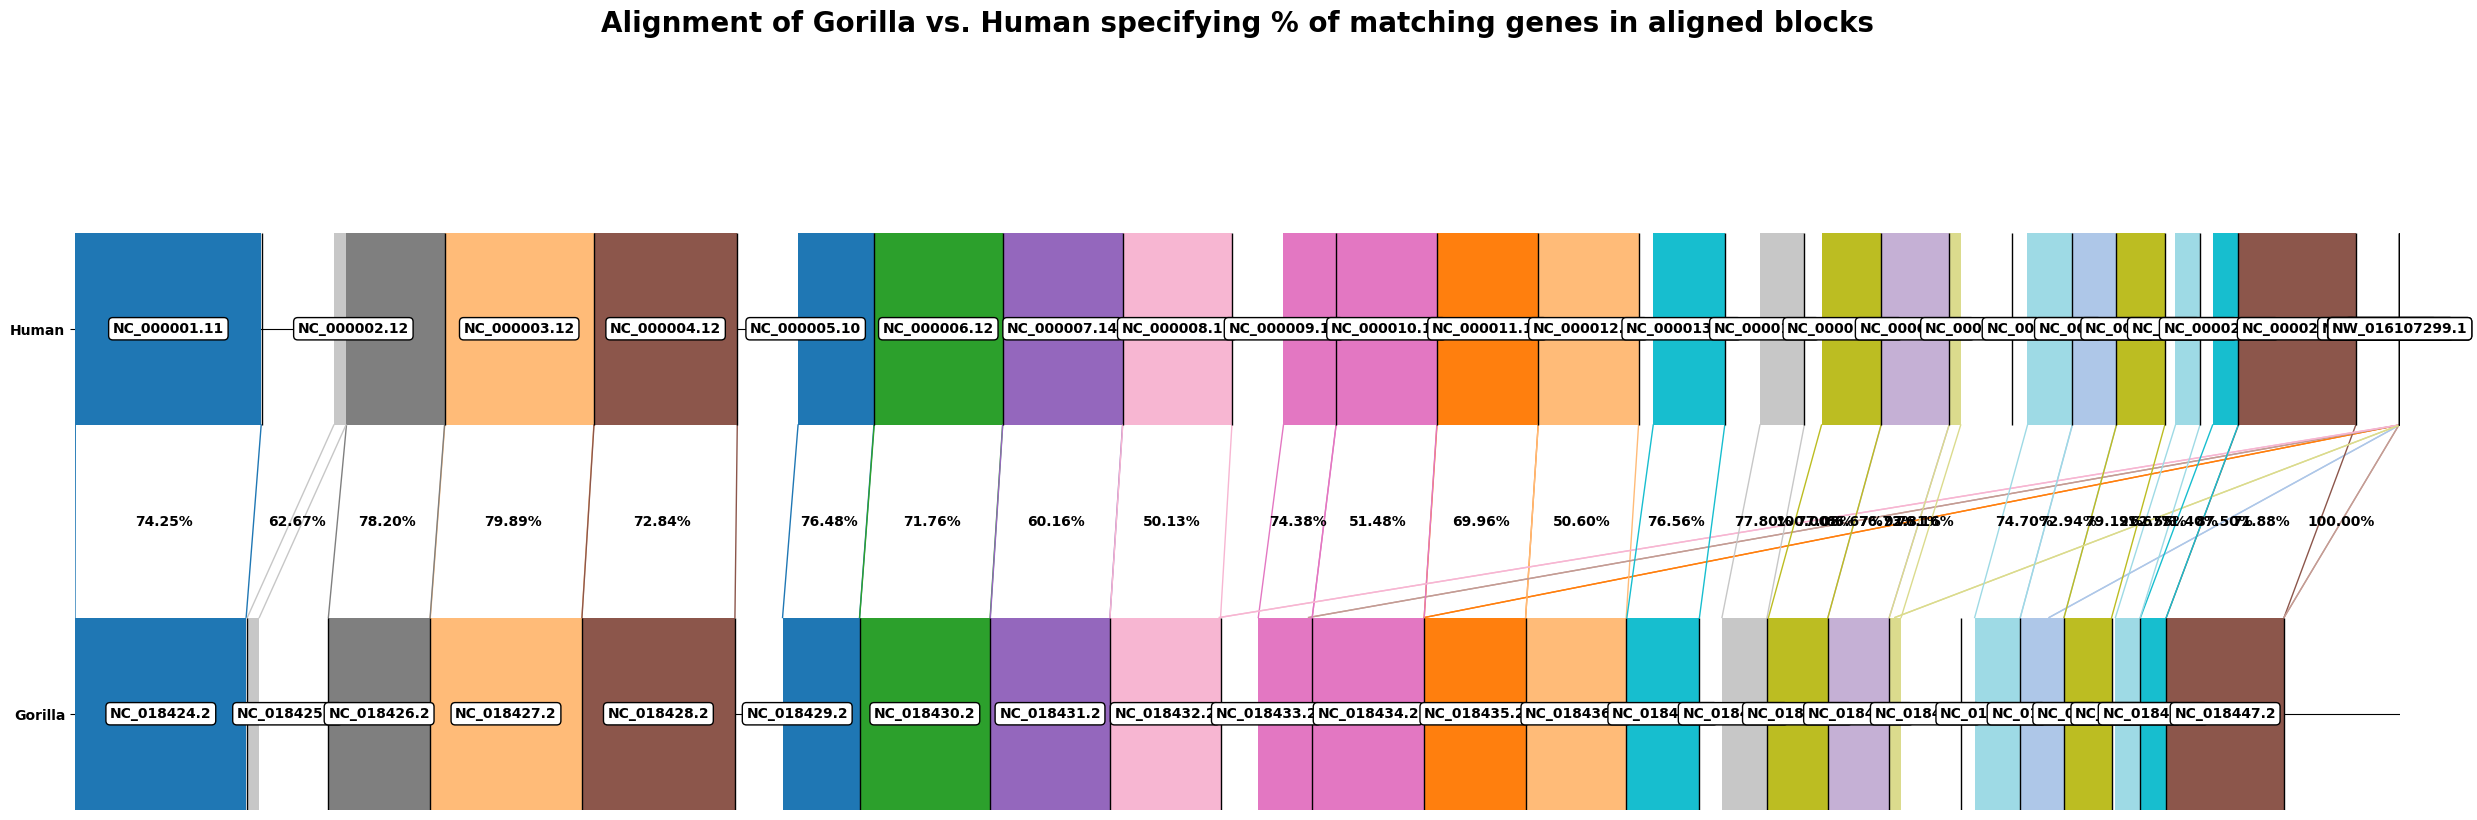

In [133]:
# Start plotting
fig, ax = plt.subplots()

# Define plot size
fig.set_size_inches(30, 10)

# Each key is an alignment_id, which determines the color of the bar
# Each block is represented per species, so we need a y-level per each species
# The y-level is determined by the species_id
# The x-level is determined by the start and length of the block
for key, value in blocks_dict.items():
        for i in value:
                # Draw the block
                ax.broken_barh([i[0]],  # start and length x-axis
                                (i[1], 0.5),            # start and height y-axis
                                facecolors=color_mapping[key], # = target_scaffold; key, if we want per alignment
                                zorder=2)


        # Add a line between the blocks for each alignment_id
        # The start positions of each block are connected by a line
        ax.plot([value[1][0][0], value[0][0][0]],
                [value[1][1], value[0][1] + 0.5],
                color=color_mapping[key], 
                linestyle='-', 
                linewidth=1)

        # The end (= start + length) positions of each block are connected by a line
        ax.plot([value[1][0][0] + value[1][0][1], value[0][0][0] + value[0][0][1]],
                [1, 0.5], #[i[1] for i in value], 
                color=color_mapping[key], 
                linestyle='-', 
                linewidth=1)
        
        # Set match_perc KPI between the two lines
        # First, compute the middle of the two lines for the x-axis
        mid_bottom_block_pos = (value[0][0][0] + (value[0][0][0] + value[0][0][1])) / 2 
        mid_top_block_pos = (value[1][0][0] + (value[1][0][0] + value[1][0][1])) / 2
        
        in_between = (mid_top_block_pos + mid_bottom_block_pos) / 2

        # Insert the KPI
        ax.text(x=in_between, # + (value[1][0][0] + (value[1][0][0] + value[1][0][1]) / 2)) / 2,
                y=0.75,
                s=value[1][3],
                ha='center',
                va='center',
                fontsize=10,
                weight='bold',
                rotation='horizontal')

ax.set_ylim(0, blocks.species.nunique())
ax.set_xlim(min(blocks.start) - 1000, max(blocks.stop) + 1000)
#ax.set_xlabel('Genomic position')

# Make grid lines visible
ax.grid(True, axis='y', linestyle='-', color='black')

# Hide axes
for key, spine in ax.spines.items():
    spine.set_visible(False)

# Set tick labels
ax.set_yticks([i + 0.25 for i in blocks.species_id.unique()], labels=blocks.species.unique())
ax.set_xticks([])

# With the help of scaffold_info_dict, we can draw a vertical line for each scaffold and its name
for key, value in scaffold_info_dict.items():
        # Draw the line
        plt.vlines(x=value[2], ymin=value[0], ymax=value[0]+0.5, color='black', linestyle='-', linewidth=1)
        
        # Write the name of the scaffold in each aligned block between a box
        # Create the box object
        box = dict(boxstyle='round', facecolor='white', alpha=1)

        ax.text(x=(value[1] + value[2])/2,
                y=value[0]+0.25,
                s=key,
                ha='center',
                va='center',
                rotation='horizontal',
                bbox=box)
        
# Set the x-axis and y-axis scales to 'auto'
#ax.autoscale(enable=True, axis='both', tight=True)

# Add a title
ax.set_title('Alignment of Gorilla vs. Human specifying % of matching genes in aligned blocks', fontsize=20)


In [132]:
fig.savefig(output + 'gorillavshuman.svg', format='svg', dpi=1200)

## Second option
One name appearance per each aligned block

Text(0.5, 1.0, 'Alignment of Human vs. Gorilla specifying % of matching genes in aligned blocks')

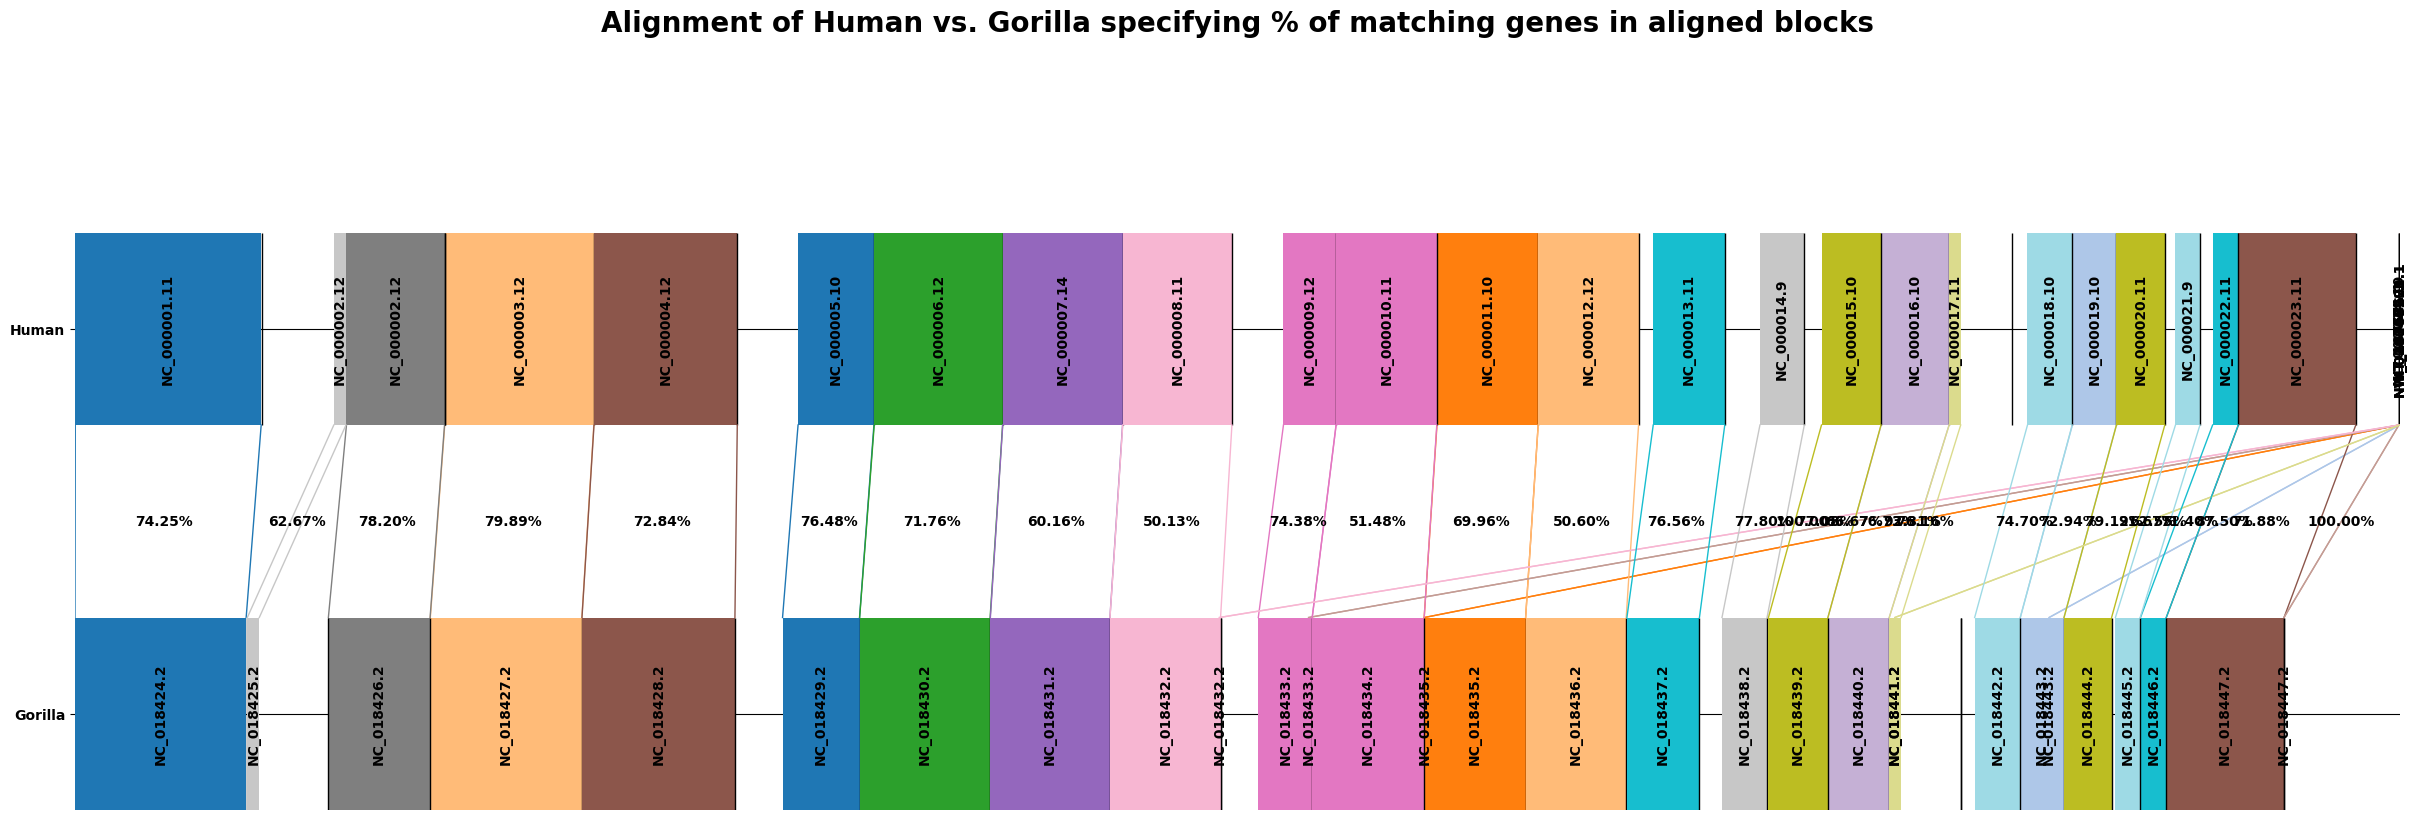

In [130]:
# Start plotting
fig, ax = plt.subplots()

# Define plot size
fig.set_size_inches(30, 10)

# Each key is an alignment_id, which determines the color of the bar
# Each block is represented per species, so we need a y-level per each species
# The y-level is determined by the species_id
# The x-level is determined by the start and length of the block
for key, value in blocks_dict.items():
        for i in value:
                # Draw the block
                ax.broken_barh([i[0]],  # start and length x-axis
                                (i[1], 0.5),            # start and height y-axis
                                facecolors=color_mapping[key], # = target_scaffold; key, if we want per alignment
                                zorder = 2)

                # Write the name of the scaffold in each aligned block
                ax.text(x=(i[0][0] + (i[0][0] + i[0][1])) / 2,
                        y=i[1] + 0.25,
                        s=i[2],
                        ha='center',
                        va='center',
                        fontsize=10,
                        weight='bold',
                        rotation='vertical')

                # Draw a line limitating each scaffold
                plt.vlines(x=i[4], ymin=i[1], ymax=i[1]+0.5, color='black', linestyle='-', linewidth=1)


        # Add a line between the blocks for each alignment_id
        # The start positions of each block are connected by a line
        ax.plot([value[1][0][0], value[0][0][0]],
                [value[1][1], value[0][1] + 0.5],
                color=color_mapping[key], 
                linestyle='-', 
                linewidth=1)

        # The end (= start + length) positions of each block are connected by a line
        ax.plot([value[1][0][0] + value[1][0][1], value[0][0][0] + value[0][0][1]],
                [1, 0.5], #[i[1] for i in value], 
                color=color_mapping[key], 
                linestyle='-', 
                linewidth=1)
        
        # Print match_perc KPI between the two lines
        # First, compute the middle of the two lines for the x-axis
        mid_bottom_block_pos = (value[0][0][0] + (value[0][0][0] + value[0][0][1])) / 2 
        mid_top_block_pos = (value[1][0][0] + (value[1][0][0] + value[1][0][1])) / 2
        
        in_between = (mid_top_block_pos + mid_bottom_block_pos) / 2

        # Insert the text
        ax.text(x=in_between, # + (value[1][0][0] + (value[1][0][0] + value[1][0][1]) / 2)) / 2,
                y=0.75,
                s=value[1][3],
                ha='center',
                va='center',
                fontsize=10,
                weight='bold',
                rotation='horizontal')



# Set tick labels
ax.set_yticks([i[1] + 0.25 for i in value], labels=blocks.species.unique())
ax.set_xticks([])


ax.set_ylim(0, blocks.species.nunique())
ax.set_xlim(min(blocks.start) - 1000, max(blocks.stop) + 1000)
#ax.set_xlabel('Genomic position')

# Make grid lines visible
ax.grid(True, axis='y', linestyle='-', color='black')

# Hide axes
for key, spine in ax.spines.items():
    spine.set_visible(False)

# Add a title
ax.set_title('Alignment of Human vs. Gorilla specifying % of matching genes in aligned blocks', fontsize=20)


In [131]:
blocks.to_csv('../../Data/Intermediate/blocks_processed.csv', index=False)